In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as pp
import numpy as np
import matplotlib.pyplot as plt

# Collect and preprocess the data

In [2]:
data=pd.read_csv("CarDataSet.csv")

In [3]:
data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
data.describe(include='all')

Unnamed: 0                    Name Location         Year  \
count   7253.000000                    7253     7253  7253.000000   
unique          NaN                    2041       11          NaN   
top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
freq            NaN                      55      949          NaN   
mean    2601.948435                     NaN      NaN  2013.365366   
std     1826.365869                     NaN      NaN     3.254421   
min        0.000000                     NaN      NaN  1996.000000   
25%      906.000000                     NaN      NaN  2011.000000   
50%     2392.000000                     NaN      NaN  2014.000000   
75%     4205.000000                     NaN      NaN  2016.000000   
max     6018.000000                     NaN      NaN  2019.000000   

        Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
count        7.253000e+03      7253         7253       7253       7251   
unique                NaN         5            2          4        450   
top                   NaN    Diesel       Manual      First  17.0 kmpl   
freq                  NaN      3852         5204       5952        207   
mean         5.869906e+04       NaN          NaN        NaN        NaN   
std          8.442772e+04       NaN          NaN        NaN        NaN   
min          1.710000e+02       NaN          NaN        NaN        NaN   
25%          3.400000e+04       NaN          NaN        NaN        NaN   
50%          5.341600e+04       NaN          NaN        NaN        NaN   
75%          7.300000e+04       NaN          NaN        NaN        NaN   
max          6.500000e+06       NaN          NaN        NaN        NaN   

         Engine   Power        Seats   New_Price        Price  
count      7207    7207  7200.000000        1006  6019.000000  
unique      150     386          NaN         625          NaN  
top     1197 CC  74 bhp          NaN  63.71 Lakh          NaN  
freq        732     280          NaN           6          NaN  
mean        NaN     NaN     5.279722         NaN     9.479468  
std         NaN     NaN     0.811660         NaN    11.187917  
min         NaN     NaN     0.000000         NaN     0.440000  
25%         NaN     NaN     5.000000         NaN     3.500000  
50%         NaN     NaN     5.000000         NaN     5.640000  
75%         NaN     NaN     5.000000         NaN     9.950000  
max         NaN     NaN    10.000000         NaN   160.000000

In [6]:
import seaborn as sns

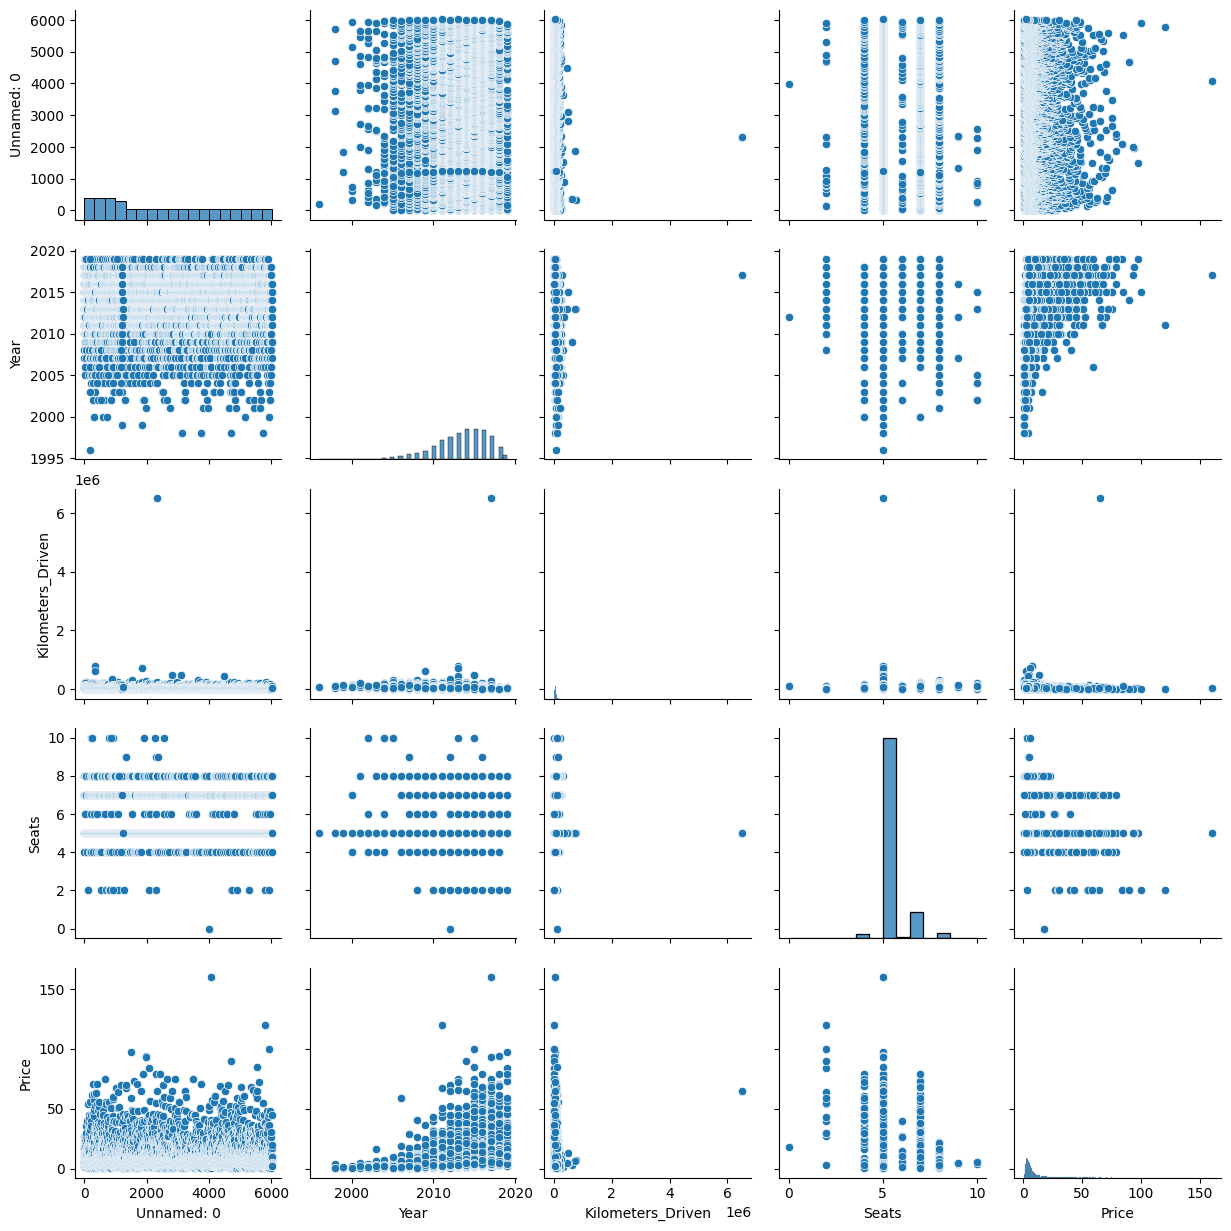

In [7]:
sns.pairplot(data)

# Preprocessing steps

In [8]:
data['Name'].str.get_dummies()

Ambassador Classic Nova Diesel  Audi A3 35 TDI Attraction  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
7248                               0                          0   
7249                               0                          0   
7250                               0                          0   
7251                               0                          0   
7252                               0                          0   

      Audi A3 35 TDI Premium  Audi A3 35 TDI Premium Plus  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   
...                      ...                          ...   
7248                       0                            0   
7249                       0                            0   
7250                       0                            0   
7251                       0                            0   
7252                       0                            0   

      Audi A3 35 TDI Technology  Audi A4 1.8 TFSI  \
0                             0                 0   
1                             0                 0   
2                             0                 0   
3                             0                 0   
4                             0                 0   
...                         ...               ...   
7248                          0                 0   
7249                          0                 0   
7250                          0                 0   
7251                          0                 0   
7252                          0                 0   

      Audi A4 1.8 TFSI Technology Edition  Audi A4 2.0 TDI  \
0                                       0                0   
1                                       0                0   
2                                       0                0   
3                                       0                0   
4                                       0                0   
...                                   ...              ...   
7248                                    0                0   
7249                                    0                0   
7250                                    0                0   
7251                                    0                0   
7252                                    0                0   

      Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
7248                                     0   
7249                                     0   
7250                                     0   
7251                                     0   
7252                                     0   

      Audi A4 2.0 TDI 177 Bhp Technology Edition  ...  Volvo S80 D5  \
0                                              0  ...             0   
1                                              0  ...             0   
2                                              0  ...             0   
3                                              0  ...             0   
4                                              0  ...             0   
...                                          ...  ...           ...   
7248                                

In [9]:
data['Power'] = data['Power'].replace({'null': None, 'nan': None})
data['Power'] = data['Power'].astype(str).str.extract('(\d+)').astype(float)

In [10]:
data['Mileage'] = data['Mileage'].astype(str).str.extract('(\d+\.\d+|\d+)').astype(float)

In [11]:
data['Engine'] = data['Engine'].astype(str).str.extract('(\d+)').astype(float)


In [12]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

In [13]:
data['Power'].fillna(data['Power'].mean(),inplace=True)

In [14]:
data['Seats'].fillna(data['Seats'].mode()[0],inplace=True)

In [15]:
data['Mileage'].fillna(data['Mileage'].mean(),inplace=True)

In [16]:
data['Engine'].fillna(data['Engine'].mean(),inplace=True)

# Exploratory data analysis (EDA)

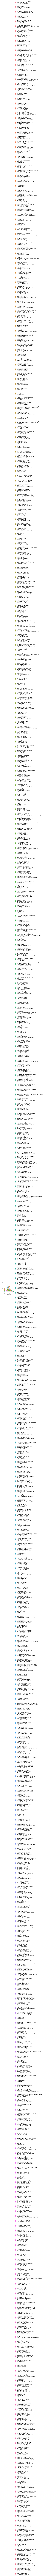

In [17]:
sns.pairplot(data, x_vars=['Mileage'], y_vars=['Price'], hue='Name')
plt.show()

In [18]:
x = data[['Mileage']]

In [19]:
y = data['Price']

# Split the data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choose a regression model

In [22]:
model = LinearRegression()

# Train and evaluate the regression model

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score


In [26]:
r2 = r2_score(y_test, y_pred)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mse = mean_squared_error(y_test, y_pred)

In [29]:
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.08134432677059078
Mean Squared Error: 89.06296734476129


# Interpret the coefficients

In [30]:
coefficients = model.coef_

In [31]:
intercept = model.intercept_

In [32]:
print("Coefficient:", coefficients)
print("Intercept:", intercept)


Coefficient: [-0.625096]
Intercept: 20.78155418263748


# Predictions on new data

In [33]:
new_data = pd.DataFrame({'Mileage': [10000, 20000, 30000]})
predicted_prices = model.predict(new_data)

In [34]:
print("Predicted Prices:", predicted_prices)

Predicted Prices: [ -6230.17842348 -12481.13840113 -18732.09837879]
